found minima
Minima lies in  [ 5.0517235  12.12068817] [ 5.05172465 12.12069085]


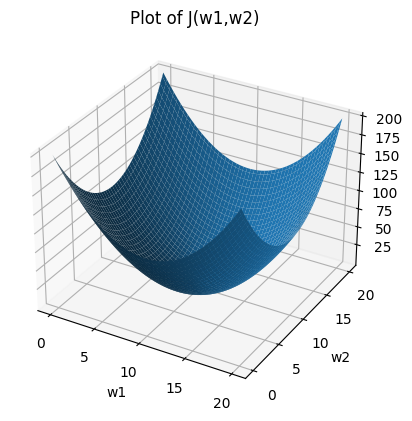

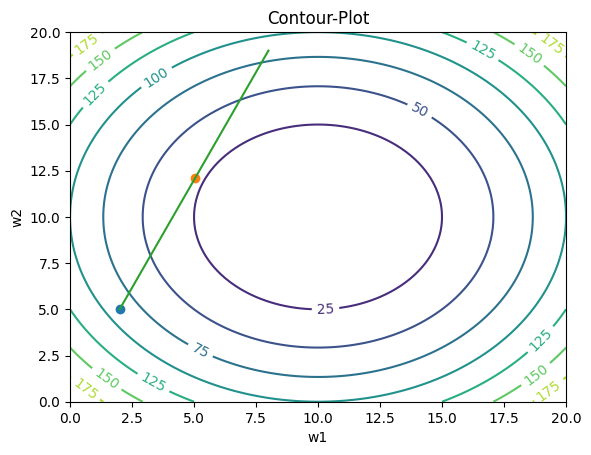

In [1]:
#Implementation of Line-Search Algorithm

import matplotlib.pyplot as plt
import numpy as np

W1=np.linspace(0,20,100)
W2=np.linspace(0,20,100)

w1,w2=np.meshgrid(W1,W2)

J=(w1-10)**2+(w2-10)**2

#defining J as a function
j=lambda a,b: (a-10)**2+(b-10)**2

#Finding minimum in search Direction 
p=np.array([2,5])
s=np.array([3,7])
a=np.linspace(0,10,200) #hyper-parameter alpha

def Interval_Halving(function,p1 = np.array([]),p2 = np.array([]),e=0.0001):

    l=4
    while (l>e):
        pm=(p1+p2)/2
        pi=(p1+pm)/2
        pj=(pm+p2)/2
        l = np.sqrt(np.dot((p1-p2).T,(p1-p2)))
        if (function(*pi)>function(*pm) and function(*pj)>function(*pm)):
            p1=pi
            p2=pj
        elif (function(*pm)>function(*pi) and function(*pj)>function(*pi)):
            p2=pm
        else:
            p1=pm
    return(p1,p2)


def Line_search(function,starting_point,vector,alpha):
    for i in range(len(alpha)-2):
        p0=starting_point+alpha[i]*vector
        p1=starting_point+alpha[i+1]*vector
        p2=starting_point+alpha[i+2]*vector

        if (function(*p0)>function(*p1) and function(*p1)<function(*p2)):
            print("found minima")
            return(Interval_Halving(function,p0,p2,0.00001))
            
    ending_point=starting_point+alpha[len(alpha)]*vector
    return None


interval=Line_search(j,p,s,a)
if interval==None:
    print("No minima in the given range")
else:
    print("Minima lies in ",*interval)



#Bracketting for given line:


#Plotting 3d:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.plot_surface(w1,w2,J)
ax.set_title("Plot of J(w1,w2)")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
plt.show()

#Contour Plot:
fig=plt.figure()
ax=fig.add_subplot(111)
c_plot=ax.contour(w1,w2,J)
ax.clabel(c_plot)
ax.set_title("Contour-Plot")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
plt.plot(*p,marker="o")
plt.plot(*(interval[0]+interval[1])/2,marker="o")
plt.plot(np.arange(2,10,3),np.arange(5,20,7))
plt.show()


In [51]:
#2b
# Line Search Alpha:

GradJ=lambda w1,w2: np.array([2*(w1-10),2*(w2-10)])
# function,starting_point,vector,alpha

def Gradient_Descent_LineSearch(function,gradient_function,starting_point,e):
    point=starting_point
    a=np.linspace(0,10,200)
    while(np.linalg.norm(gradient_function(*point))>e):
        points=Line_search(function,point,-gradient_function(*point),a)
        point=(points[0]+points[1])/2
    return point


print(Gradient_Descent_LineSearch(j,GradJ,p,0.00001))



found minima
found minima
[10.0000002  10.00000012]


In [55]:
#2a Gradient Descent Fixed Alpha
GradJ=lambda w1,w2: np.array([2*(w1-10),2*(w2-10)])
j=lambda a,b: (a-10)**2+(b-10)**2

a=0.001 #alpha-hyper parameter
def Gradient_Descent_fixedalpha(gradient_function,function,a,starting_point,e):
    point=starting_point
    while(np.linalg.norm(gradient_function(*point))>e):
        point=point-gradient_function(*point)*a
    return point
print(Gradient_Descent_fixedalpha(GradJ,j,a,np.array([2,5]),0.00001))


[9.99999576 9.99999735]
